<a href="https://colab.research.google.com/github/J-Milando-10/STA-365-Homework/blob/main/STA365_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pymc as pm
import arviz as az


from google.colab import files
uploaded = files.upload() #this will prompt you to choose a file
import io
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

Saving diabetes.csv to diabetes.csv


In [2]:
#df =df.iloc[:50]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#X = df.drop(columns = ['Outcome'], axis = 1); #multivariate version
X = df.BMI;
obs = df.Outcome;

# c = X.shape[1]; #for multivariate
c = len(X);

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

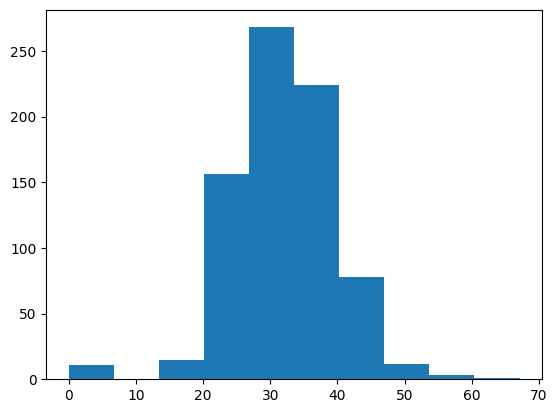

In [4]:
plt.hist(X)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

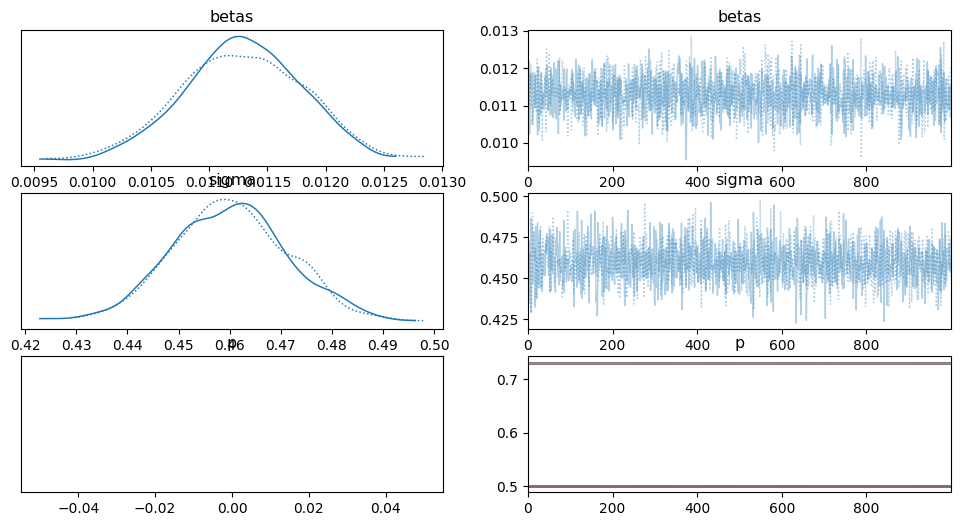

In [5]:
with pm.Model() as MLR:
    betas = pm.Normal('betas', mu=0, sigma=1)
    sigma = pm.HalfCauchy('sigma', beta=10)
    z = pm.Normal('z', mu=pm.math.dot(X, betas), sigma=sigma, observed=obs)
    p = pm.Deterministic("p", pm.math.invlogit(z))
    y = pm.Binomial('y', n= 1, p = p, observed=obs)

with MLR:
    idata = pm.sample()

az.plot_trace(idata)

No crazy convergence or performance issues

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

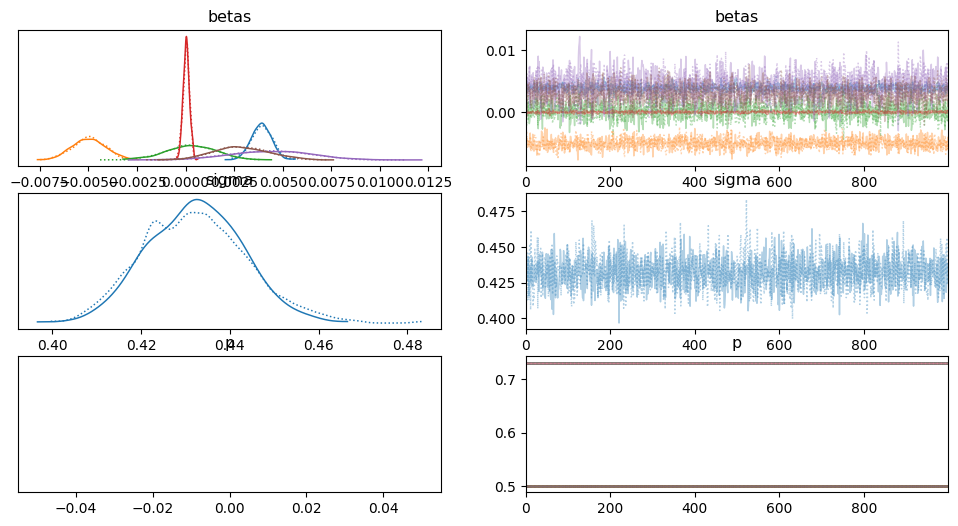

In [6]:
#multivariable version
X = df.drop(columns = ['Outcome','Pregnancies', 'DiabetesPedigreeFunction'], axis = 1); #multivariate version
obs = df.Outcome;

c = X.shape[1]; #for multivariate

labels = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
coords = {"coeffs": labels}

with pm.Model(coords=coords) as MLR:
    betas = pm.MvNormal('betas', mu=np.zeros(c), cov=np.eye(c), dims='coeffs')
    sigma = pm.HalfCauchy('sigma', beta=10)
    z = pm.Normal('z', mu=pm.math.dot(X, betas), sigma=sigma, observed=obs)
    p = pm.Deterministic("p", pm.math.invlogit(z))
    y = pm.Binomial('y', n= 1, p = p, observed=obs)

with MLR:
    idata = pm.sample()

az.plot_trace(idata)


No Noticable problems in convergence or tailing off

Part 2
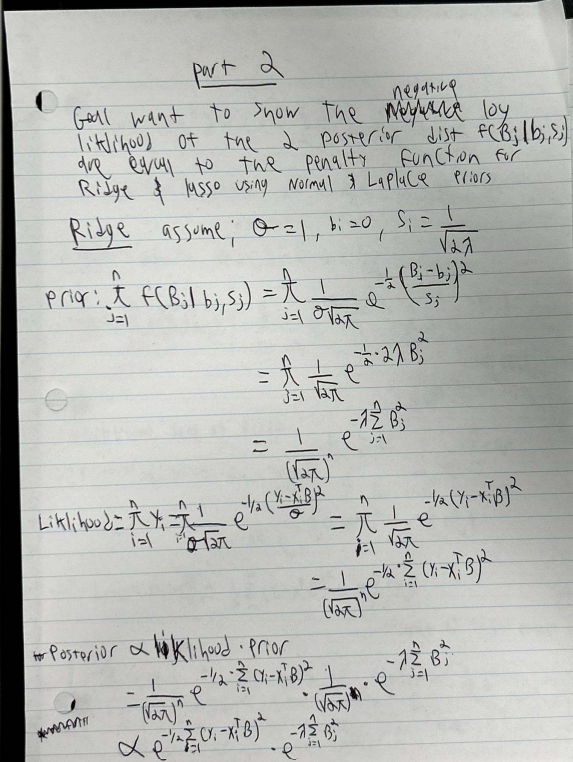


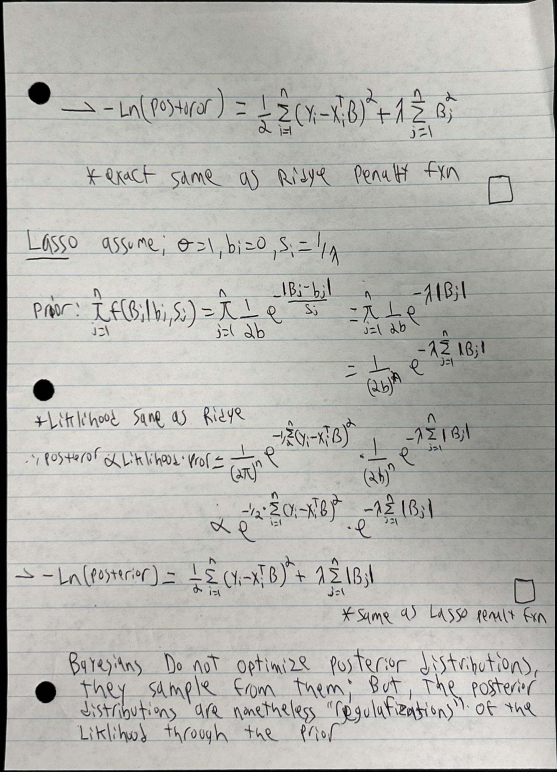